# The 1-d Harmonic Oscillator

## Table of Contents:
* [Introduction](#first-bullet)
* [Classical Harmonic Oscillator](#second-bullet)
* [Numerical Methods](#second-bullet)
* [Damped Oscillator](#second-bullet)
* [Forced Oscillator](#second-bullet)
* [Linear Response Theory](#second-bullet)
* [Phase Space](#second-bullet)
* [Nonlinear Oscillator](#second-bullet)
* [Quantum Mechanical Harmonic Oscillator](#second-bullet)

## Introduction <a class="anchor" id="first-bullet"></a>

Conservative mechanical systems are those that 
    1. Only depend on space
    2. The work done is path independent
    3. Energy is conserved
    4. The forces have no curl
    5. The forces can be expressed as the gradient of a scalar field 

Local Minima in mechanical systems are harmonic oscillators

Harmonic Oscillator Newtonian View

Harmonic Oscillator Lagrangian View

Harmonic Oscillator Hamiltonian View


## Classical Harmonic Oscillator <a class="anchor" id="second-bullet"></a>

One dimensional Oscillator

Two dimensional Harmonic Oscillator


## Third Bullet Header <a class="anchor" id="third-bullet"></a>


## Fourth Bullet Header <a class="anchor" id="fourth-bullet"></a>

In [1]:
## F Bullet Header <a class="anchor" id="second-bullet"></a>

In [2]:
## Fourth Bullet Header <a class="anchor" id="second-bullet"></a>

In [3]:
## Fourth Bullet Header <a class="anchor" id="second-bullet"></a>

In [4]:
## Fourth Bullet Header <a class="anchor" id="second-bullet"></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift

$m\ddot{x} = -kx$

$\dot{v} = -\frac{k}{m}x$this is dvdt  \
$v = \dot{x}$ this is dxdt1


In [6]:
""" """
def dvdt1(x, y, z):
    return -100 * y

""" """
def dxdt1(x, y, z):
    return z

In [7]:
def RungeKuttaCoupled1(x, y, z, dx, dydx, dzdx):
    # x --> t
    # y --> x
    # z --> v
    # dydx --> dx/dt = v
    # dzdx --> dv/dt = -x
    k1 = dx*dydx(x, y, z)
    h1 = dx*dzdx(x, y, z)
    k2 = dx*dydx(x+dx/2., y+k1/2., z+h1/2.)
    h2 = dx*dzdx(x+dx/2., y+k1/2., z+h1/2.)
    k3 = dx*dydx(x+dx/2., y+k2/2., z+h2/2.)
    h3 = dx*dzdx(x+dx/2., y+k2/2., z+h2/2.)
    k4 = dx*dydx(x+dx, y+k3, z+h3)
    h4 = dx*dzdx(x+dx, y+k3, z+h3)

    y = y + 1./6.*(k1+2*k2+2*k3+k4)
    z = z + 1./6.*(h1+2*h2+2*h3+h4)
    #x = x + dx
    
    return y, z

In [8]:
_TIME_STEP = 0.01

In [9]:
_INITAL_POSITION = 3
_INITAL_VELOCITY = 0

In [10]:
_N_TIME_STEPS = int(1e4)

In [11]:
time = 0
dt = _TIME_STEP
t_end = _N_TIME_STEPS * _TIME_STEP

In [12]:
positions = np.zeros(_N_TIME_STEPS)
velocities = np.zeros(_N_TIME_STEPS)
forces = np.zeros(_N_TIME_STEPS)

ENERGY = np.zeros(_N_TIME_STEPS)

In [13]:
positions[0] = _INITAL_POSITION
velocities[0] = _INITAL_VELOCITY

In [14]:
for step in range(_N_TIME_STEPS - 1):
    p, v = RungeKuttaCoupled1(time, positions[step], velocities[step], dt, dxdt1, dvdt1)
    positions[step + 1] = p
    velocities[step + 1] = v
    time = time + dt

In [15]:
positions;

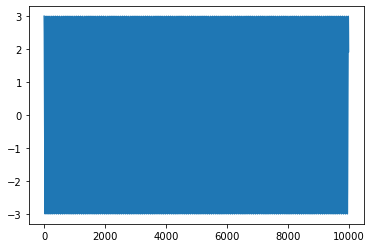

In [16]:
plt.plot(positions)

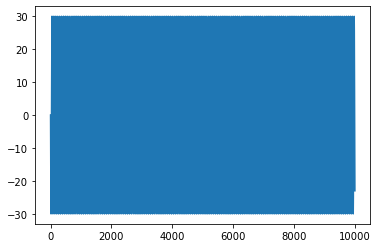

In [17]:
plt.plot(velocities)

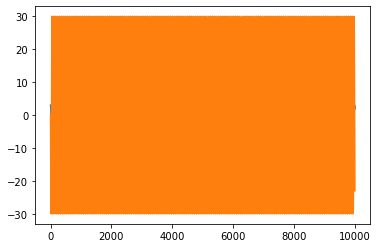

In [18]:
plt.plot(positions)
plt.plot(velocities)

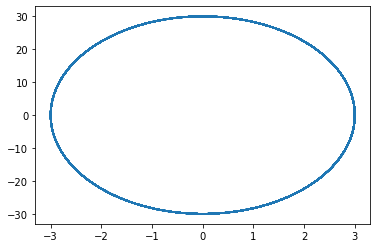

In [19]:
plt.plot(positions, velocities)

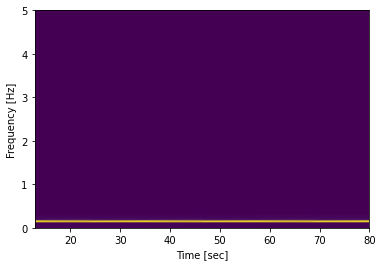

In [20]:
fs = 10
N = 1e5
f, t, Sxx = signal.spectrogram(positions[:1000], fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
df = f[3] - f[2]
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

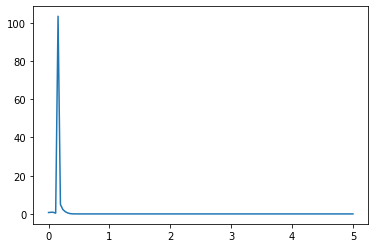

In [21]:
psd = np.mean(Sxx, axis=1)
plt.plot(f, psd)

In [22]:
f[np.argmax(psd)]

0.15625

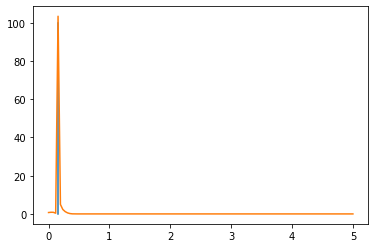

In [23]:

psd = np.mean(Sxx, axis=1)
plt.plot(np.ones(100) * f[np.argmax(psd)], np.linspace(0, 100, 100))
plt.plot(f, psd)

In [24]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

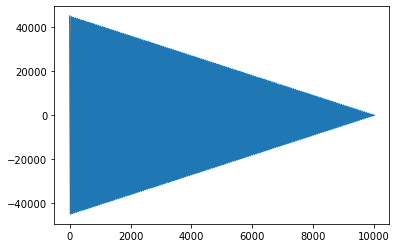

In [25]:
plt.plot(autocorr(positions))